In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import glob
import sys
import os
import time
import random
import math

# DATALOADER
import cv2
from PIL import Image
import numpy as np
import albumentations as A
import torchvision.transforms as T
from PIL import Image
import pandas as pd

# BUILDING MODEL
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models  # Import ResNet-50

# TRAINING
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm


## Load and Inspect data

In [ ]:
data_folder_1 = '/content/drive/MyDrive/train'
metadata_file_1 = '/content/drive/MyDrive/train.csv'

In [ ]:
data_folder_2 = '/content/drive/MyDrive/test'
metadata_file_2 = '/content/drive/MyDrive/test_kaggletest.csv'

In [ ]:
train_data = pd.read_csv(metadata_file_1)
test_data = pd.read_csv(metadata_file_2)


## Display Top Images from Different Groups

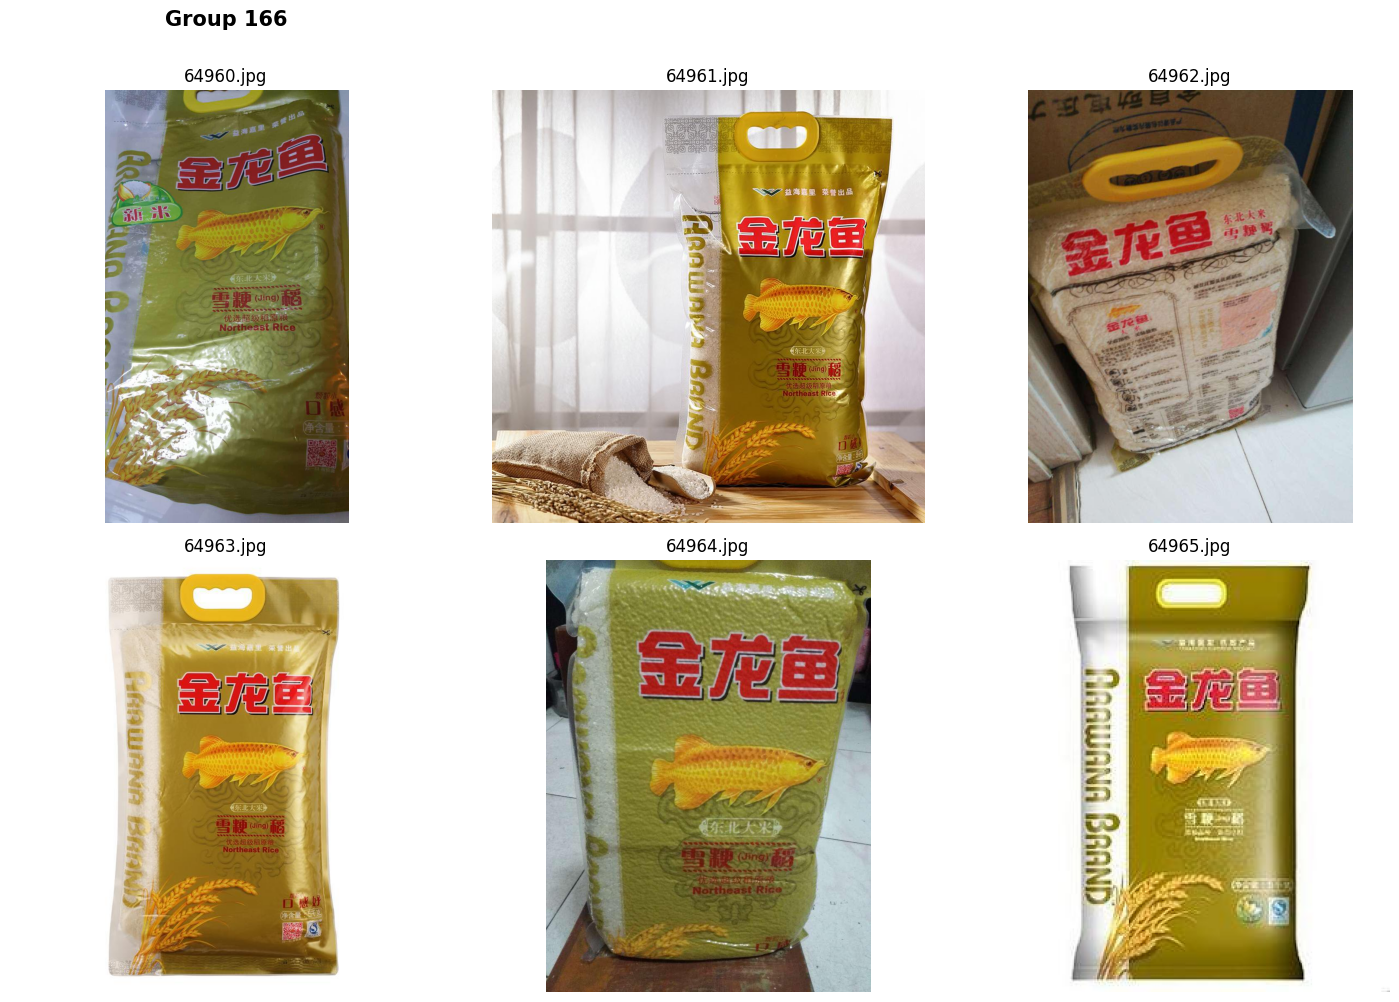

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import pandas as pd


def display_top_images_from_group(data_folder, metadata, group_id, num_images=6, images_per_row=3):
    # Filter metadata based on the specified group ID
    filtered_metadata = metadata[metadata['group'] == group_id]

    # Sort the filtered metadata by some criterion (e.g., image name)
    sorted_metadata = filtered_metadata.sort_values(by='name')

    # Select the top 'num_images' from the sorted metadata
    top_metadata = sorted_metadata.head(num_images)

    # Calculate the number of rows and columns needed for subplots
    num_rows = (num_images + images_per_row - 1) // images_per_row
    num_cols = images_per_row

    # Set up subplots with the desired number of rows and columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    axs[0, 0].text(0.5, 1.15, f"Group {group_id}", fontsize=15, fontweight='bold', ha='center', transform=axs[0, 0].transAxes)
    axs[0, 0].axis('off')  # Turn off axis labels and ticks

    # Loop through images in the top metadata and display them in rows and columns
    for i, (_, row) in enumerate(top_metadata.iterrows()):
        image_name = row['name']
        image_path = os.path.join(data_folder, image_name)

        if os.path.exists(image_path):
            # Open the image using matplotlib and display it
            ax = axs[i // images_per_row, i % images_per_row]
            ax.imshow(plt.imread(image_path))
            ax.axis('off')  # Turn off axis labels and ticks
            ax.set_title(image_name)
        else:
            print(f"Image not found: {image_path}")

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

# Randomly select a group ID
unique_groups = train_data['group'].unique()
random_group_id = random.choice(list(unique_groups))

# Call the function to display the top 10 images from the randomly selected group with 3 images in 2 rows
display_top_images_from_group(data_folder_1, train_data, random_group_id, num_images=6, images_per_row=3)

## Display Top Images from Different Classes

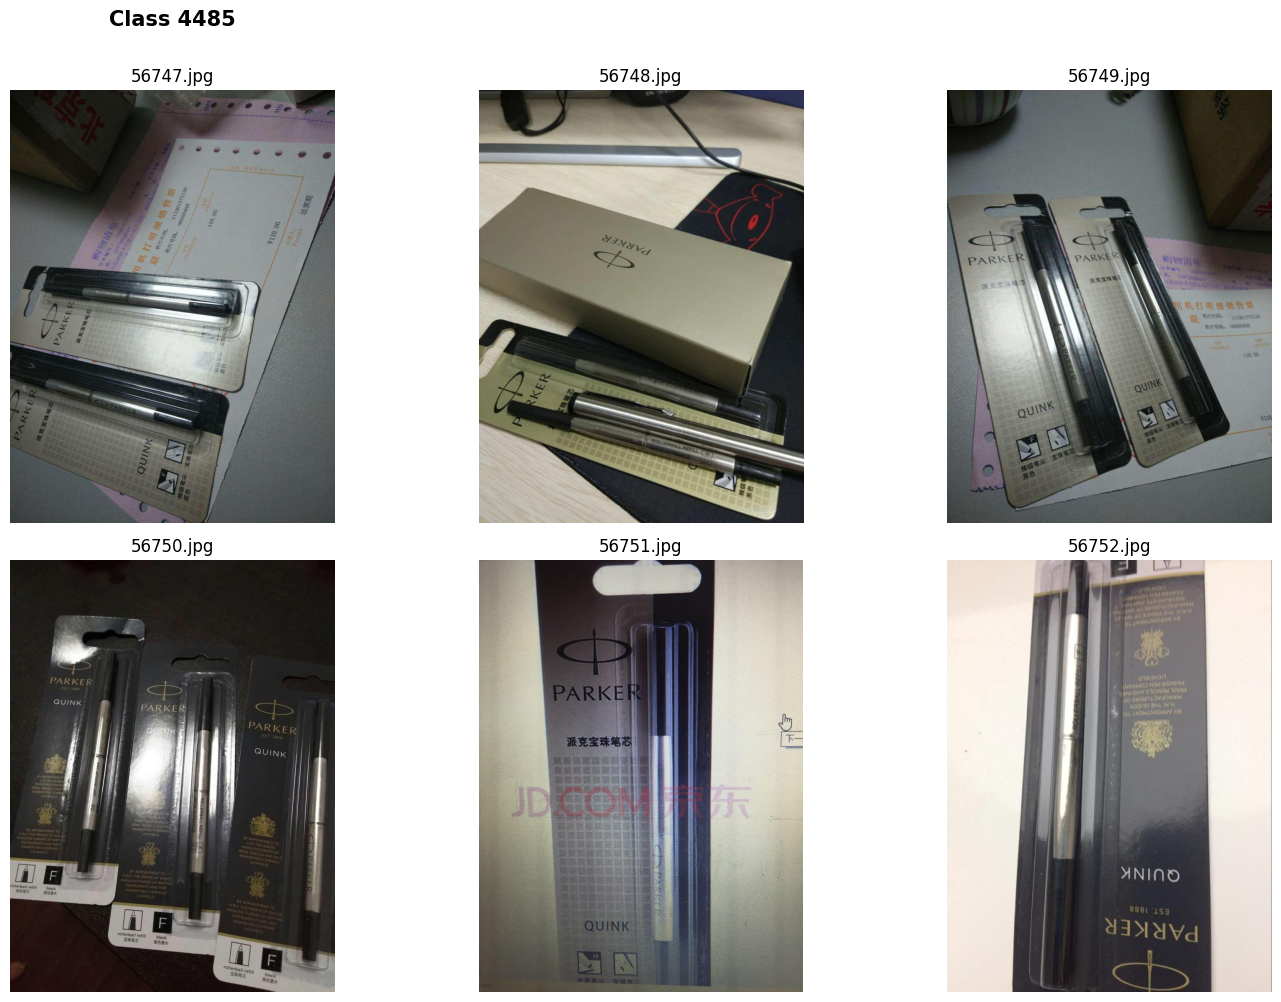

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have properly defined data_folder and metadata
# data_folder = ...
# metadata = ...

def display_top_images_from_class(data_folder, metadata, class_id, num_images=6, images_per_row=3):
    # Filter metadata based on the specified group ID
    filtered_metadata = metadata[metadata['class'] == class_id]

    # Sort the filtered metadata by some criterion (e.g., image name)
    sorted_metadata = filtered_metadata.sort_values(by='name')

    # Select the top 'num_images' from the sorted metadata
    top_metadata = sorted_metadata.head(num_images)

    # Calculate the number of rows and columns needed for subplots
    num_rows = (num_images + images_per_row - 1) // images_per_row
    num_cols = images_per_row

    # Set up subplots with the desired number of rows and columns
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    axs[0, 0].text(0.5, 1.15, f"Class {class_id}", fontsize=15, fontweight='bold', ha='center', transform=axs[0, 0].transAxes)
    axs[0, 0].axis('off')  # Turn off axis labels and ticks

    # Loop through images in the top metadata and display them in rows and columns
    for i, (_, row) in enumerate(top_metadata.iterrows()):
        image_name = row['name']
        image_path = os.path.join(data_folder, image_name)

        if os.path.exists(image_path):
            # Open the image using matplotlib and display it
            ax = axs[i // images_per_row, i % images_per_row]
            ax.imshow(plt.imread(image_path))
            ax.axis('off')  # Turn off axis labels and ticks
            ax.set_title(image_name)
        else:
            print(f"Image not found: {image_path}")

    plt.tight_layout()  # Ensure proper spacing between subplots
    plt.show()

# Randomly select a group ID
unique_classes = train_data['class'].unique()
random_class_id = random.choice(list(unique_classes))

# Call the function to display the top 10 images from the randomly selected group with 3 images in 2 rows
display_top_images_from_class(data_folder_1, train_data, random_class_id, num_images=6, images_per_row=3)

## *Exploratory Analysis*

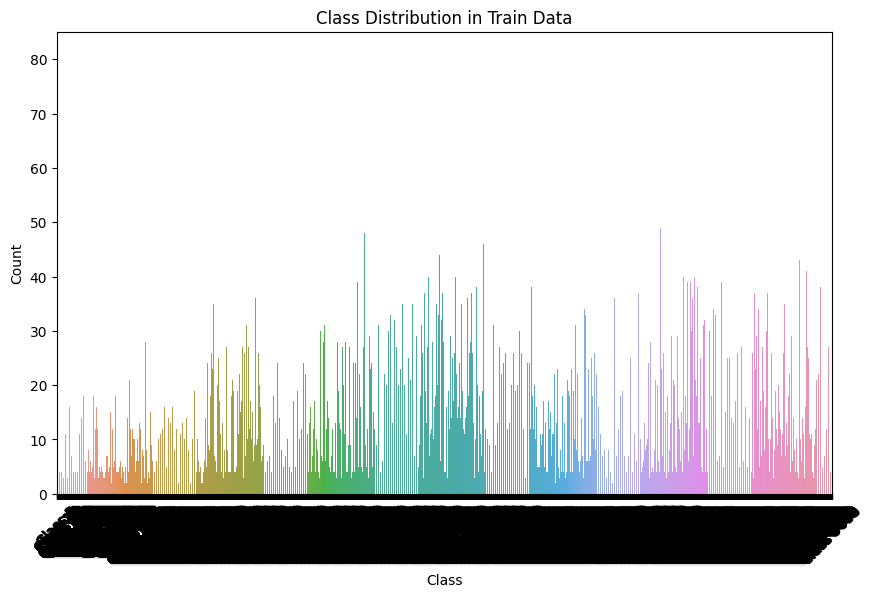

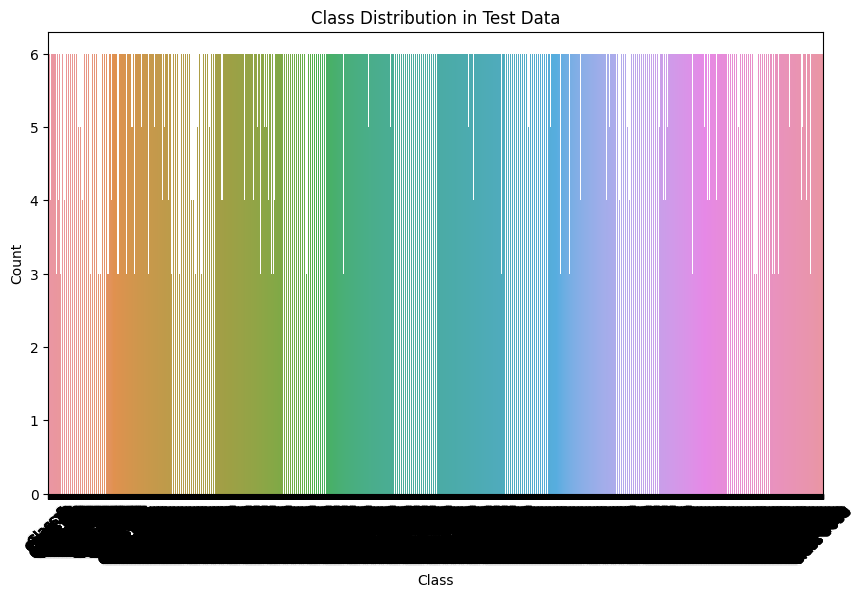

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data and test_data are your DataFrames

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x="class")
plt.title("Class Distribution in Train Data")
plt.xlabel("Class")
plt.ylabel("Count")

# Set tick labels for each class
class_labels = ["Class {}".format(i) for i in range(train_data["class"].nunique())]
plt.xticks(ticks=range(train_data["class"].nunique()), labels=class_labels, rotation=45)

plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=test_data, x="class")
plt.title("Class Distribution in Test Data")
plt.xlabel("Class")
plt.ylabel("Count")

# Set tick labels for each class
class_labels = ["Class {}".format(i) for i in range(test_data["class"].nunique())]
plt.xticks(ticks=range(test_data["class"].nunique()), labels=class_labels, rotation=45)

plt.show()


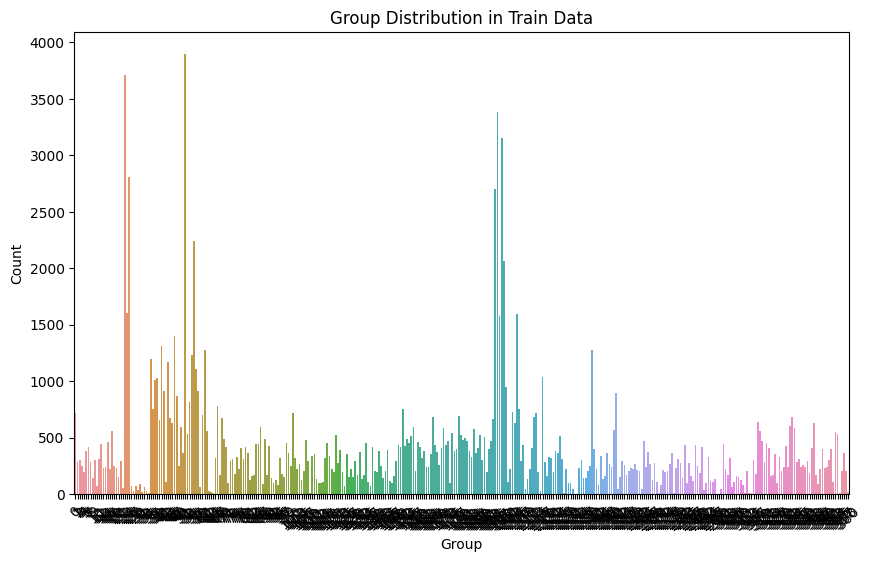

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x="group")
plt.title("Group Distribution in Train Data")
plt.xlabel("Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


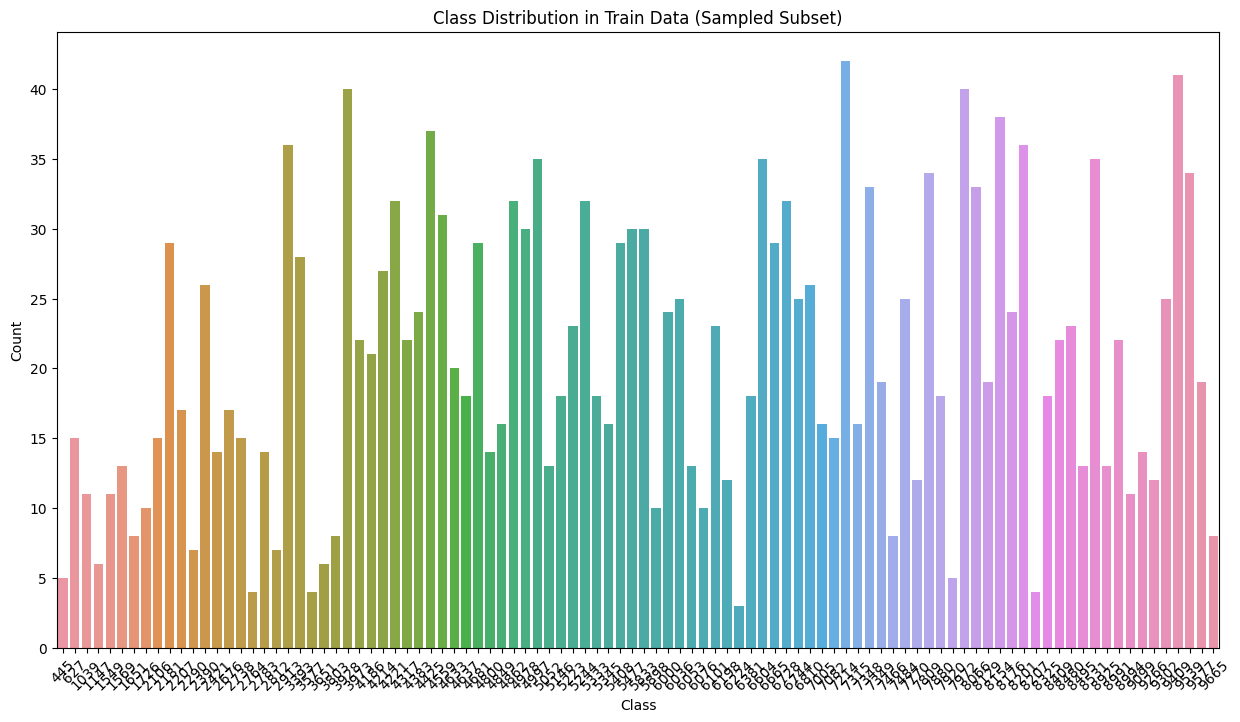

In [ ]:
# Assuming train_data is your DataFrame
sampled_classes = train_data["class"].sample(n=100)  # You can change the number of samples

plt.figure(figsize=(15, 8))
sns.countplot(data=train_data[train_data["class"].isin(sampled_classes)], x="class")
plt.title("Class Distribution in Train Data (Sampled Subset)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# used for training
training_samples = []
values_counts = []
num_classes = 0

df = pd.read_csv('/content/drive/MyDrive/train.csv')
df_g = df.groupby('class', group_keys=True).apply(lambda x: x)


train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
train_df['path'] = train_df.apply(lambda x: '/content/drive/MyDrive/train' + '/' + x['name'], axis=1)


# remove 9397815.jpg from the list!
test_df = pd.read_csv('/content/drive/MyDrive/test_kaggletest.csv')
#test_df = test_df.drop(test_df[test_df.name == '9397815.jpg'].index) # smt wrong with this img
test_df['path'] = test_df.apply(lambda x: '/content/drive/MyDrive/test' + '/' + x['name'], axis=1)

df = pd.concat([
    test_df[['name', 'class','path']],
    train_df[['name','class', 'path']]
])
df_g = df.groupby('class', group_keys=True).apply(lambda x: x)



In [ ]:
train_df

,name,class,group,path
0,1.jpg,0,0,/content/drive/MyDrive/train/1.jpg
1,2.jpg,0,0,/content/drive/MyDrive/train/2.jpg
2,3.jpg,0,0,/content/drive/MyDrive/train/3.jpg
3,4.jpg,0,0,/content/drive/MyDrive/train/4.jpg
4,5.jpg,0,0,/content/drive/MyDrive/train/5.jpg
...,...,...,...,...
141926,141927.jpg,9689,326,/content/drive/MyDrive/train/141927.jpg
141927,141928.jpg,9690,349,/content/drive/MyDrive/train/141928.jpg
141928,141929.jpg,9690,349,/content/drive/MyDrive/train/141929.jpg
141929,141930.jpg,9690,349,/content/drive/MyDrive/train/141930.jpg


In [ ]:
test_df

,name,class,Usage,path
0,3963142.jpg,0,Public,/content/drive/MyDrive/test/3963142.jpg
1,1209854.jpg,0,Public,/content/drive/MyDrive/test/1209854.jpg
2,8638678.jpg,0,Private,/content/drive/MyDrive/test/8638678.jpg
3,6997109.jpg,0,Private,/content/drive/MyDrive/test/6997109.jpg
4,3134887.jpg,0,Private,/content/drive/MyDrive/test/3134887.jpg
...,...,...,...,...
55371,5024167.jpg,9690,Public,/content/drive/MyDrive/test/5024167.jpg
55372,2903198.jpg,9690,Public,/content/drive/MyDrive/test/2903198.jpg
55373,6184217.jpg,9690,Private,/content/drive/MyDrive/test/6184217.jpg
55374,9593422.jpg,9690,Private,/content/drive/MyDrive/test/9593422.jpg


In [ ]:
df

,name,class,path
0,3963142.jpg,0,/content/drive/MyDrive/test/3963142.jpg
1,1209854.jpg,0,/content/drive/MyDrive/test/1209854.jpg
2,8638678.jpg,0,/content/drive/MyDrive/test/8638678.jpg
3,6997109.jpg,0,/content/drive/MyDrive/test/6997109.jpg
4,3134887.jpg,0,/content/drive/MyDrive/test/3134887.jpg
...,...,...,...
141926,141927.jpg,9689,/content/drive/MyDrive/train/141927.jpg
141927,141928.jpg,9690,/content/drive/MyDrive/train/141928.jpg
141928,141929.jpg,9690,/content/drive/MyDrive/train/141929.jpg
141929,141930.jpg,9690,/content/drive/MyDrive/train/141930.jpg


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the sample image you want to open
sample_image_path = '/content/drive/MyDrive/test/9397815.jpg'

# Open and display the image using matplotlib
sample_image = mpimg.imread(sample_image_path)
plt.imshow(sample_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

OSError: ignored

***Something is wrong with this image***

In [ ]:
# used for training
training_samples = []
values_counts = []
num_classes = 0

df = pd.read_csv('/content/drive/MyDrive/train.csv')
df_g = df.groupby('class', group_keys=True).apply(lambda x: x)


train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
train_df['path'] = train_df.apply(lambda x: '/content/drive/MyDrive/train' + '/' + x['name'], axis=1)


# remove 9397815.jpg from the list!
test_df = pd.read_csv('/content/drive/MyDrive/test_kaggletest.csv')
test_df = test_df.drop(test_df[test_df.name == '9397815.jpg'].index) # smt wrong with this img
test_df['path'] = test_df.apply(lambda x: '/content/drive/MyDrive/test' + '/' + x['name'], axis=1)

df = pd.concat([
    test_df[['class','path']],
    train_df[['class', 'path']]
])
df_g = df.groupby('class', group_keys=True).apply(lambda x: x)



In [ ]:
# from PIL import Image

# # Define a function to calculate aspect ratios
# def calculate_aspect_ratio(image_path):
#     image = Image.open(image_path)
#     width, height = image.size
#     return width / height

# # Apply the function to each row in the DataFrame to calculate aspect ratios
# df['aspect_ratio'] = df['path'].apply(calculate_aspect_ratio)

# # Display the updated DataFrame with the new 'aspect_ratio' column
# print(df)


KeyboardInterrupt: ignored

## Image statistics

In [ ]:
from PIL import Image
import numpy as np
import os

# Get a list of image filenames in the directory
image_filenames = os.listdir(data_folder_1)

# Choose 100 random image filenames from the list
random_image_filenames = np.random.choice(image_filenames, size=100, replace=False)

# Open and process each random image
sample_images = []
for img_filename in random_image_filenames:
    img_path = os.path.join(data_folder_1, img_filename)
    img = Image.open(img_path)
    sample_images.append(img)

# Calculate mean and standard deviation of pixel values
mean_pixel_values = np.mean([np.array(img).mean(axis=(0, 1)) for img in sample_images], axis=0)
std_pixel_values = np.mean([np.array(img).std(axis=(0, 1)) for img in sample_images], axis=0)

print("Mean Pixel Values:", mean_pixel_values)
print("Standard Deviation of Pixel Values:", std_pixel_values)



Mean Pixel Values: [125.87353298 122.56954338 115.54639392]
Standard Deviation of Pixel Values: [60.81640906 59.70941922 59.10743952]


In [ ]:
def extract_image_features(data_folder, metadata):
    aspect_ratios = []

    for i, (_, row) in enumerate(metadata.iterrows()):
        image_name = row['name']
        image_path = os.path.join(data_folder, image_name)

        if os.path.exists(image_path):
            image = Image.open(image_path)
            width, height = image.size
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)
        else:
            print(f"Image not found: {image_path}")

    metadata['aspect_ratio'] = aspect_ratios

def show_aspect_ratios(data_folder, metadata):
    extract_image_features(data_folder, metadata)
    print(metadata[['name', 'aspect_ratio']])

# Select the desired group from train_data (e.g., group 1)


In [ ]:
def plot_aspect_ratios(image_names, aspect_ratios):
    # Create a bar plot for aspect ratios
    plt.figure(figsize=(10, 6))
    plt.bar(image_names, aspect_ratios)
    plt.xlabel('Image Names')
    plt.ylabel('Aspect Ratio')
    plt.title('Aspect Ratios of Selected Images')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
show_aspect_ratios(data_folder_1, train_data)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-c2e7beb707b5>", line 1, in <cell line: 1>
    show_aspect_ratios(data_folder_1, train_data)
  File "<ipython-input-10-c57179d17631>", line 19, in show_aspect_ratios
    extract_image_features(data_folder, metadata)
  File "<ipython-input-10-c57179d17631>", line 9, in extract_image_features
    image = Image.open(image_path)
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3236, in open
    prefix = fp.read(16)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceb

TypeError: ignored

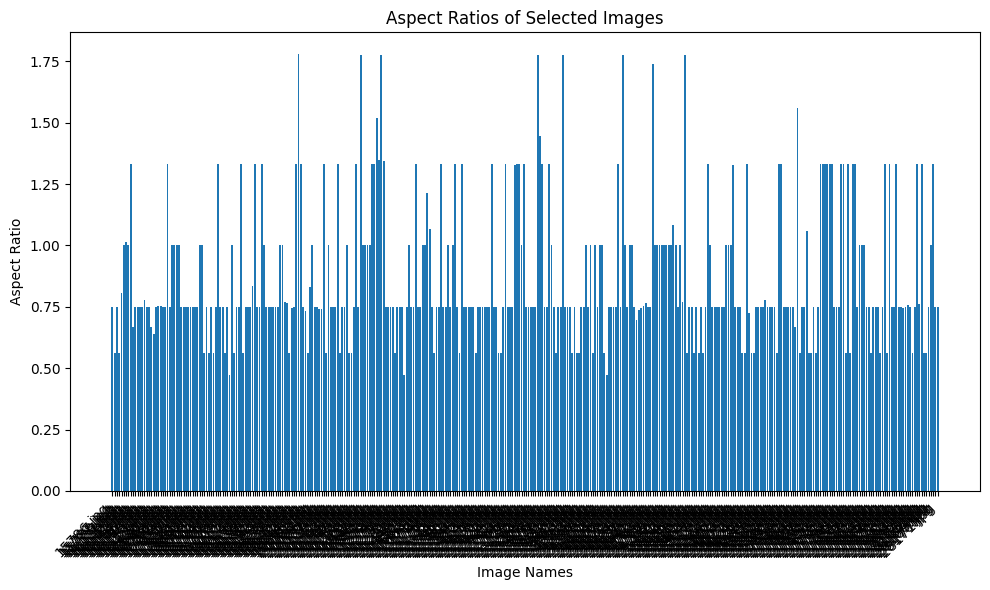

In [ ]:
plot_aspect_ratios(selected_data['name'], selected_data['aspect_ratio'])

## Augmentations

In [ ]:
import typing as t

import cv2
import torchvision.transforms as T
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

In [ ]:
def get_image_transforms(input_size: int) -> t.Tuple[T.Compose, T.Compose]:
    train_transforms = T.Compose(
            [
                 T.Resize(input_size, antialias=True),
                 T.AutoAugment(),
                 T.Resize((input_size, input_size), antialias=True)
            ]
        )

    valid_transform = T.Compose(
        [
         T.Resize((input_size, input_size), antialias=True),
         ]
    )
    return train_transforms, valid_transform

In [ ]:
def transforms_cutout(image_size: int):
    train_transforms = A.Compose([
            A.Resize(image_size, image_size),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=10, border_mode=0, p=0.5),
            A.Cutout(max_h_size=int(image_size * 0.4), max_w_size=int(image_size * 0.4), num_holes=1, p=0.5),
            ToTensorV2(),
        ])
    return train_transforms

In [ ]:
def transforms_happy_whale(image_size):
    aug8p3 = A.OneOf([
            A.Sharpen(p=0.3),
            A.ToGray(p=0.3),
            A.CLAHE(p=0.3),
        ], p=0.5)

    train_transforms = A.Compose([
            A.ShiftScaleRotate(rotate_limit=15, scale_limit=0.1, border_mode=cv2.BORDER_REFLECT, p=0.5),
            A.Resize(image_size, image_size),
            aug8p3,
            A.HorizontalFlip(p=0.5),
            A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            ToTensorV2(),
        ])
    return train_transforms

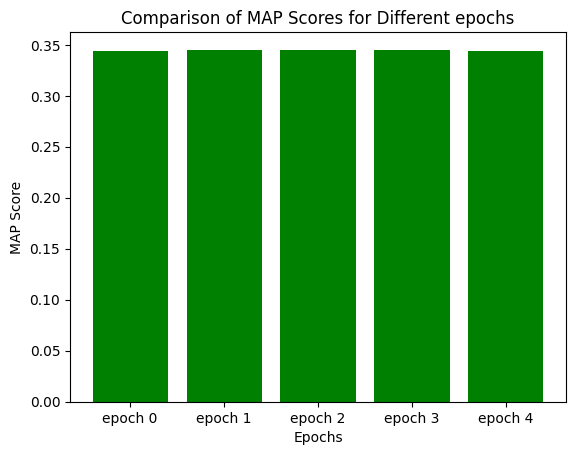

In [ ]:
import matplotlib.pyplot as plt

# Sample data for different experiments and their MAP scores
experiments = ['epoch 0', 'epoch 1','epoch 2','epoch 3','epoch 4',]
map_scores = [0.34361757105943147, 0.345021533161068, 0.345176571920758, 0.345099052540913, 0.3443841515934539]

# Create a bar chart
plt.bar(experiments, map_scores, color='green')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('MAP Score')
plt.title('Comparison of MAP Scores for Different epochs')

# Show the plot
plt.show()
